In [12]:
import pandas as pd

In [13]:
fileScience = 'schoolscience2018.xlsx'
fileMath = 'schoolmath2018.xlsx'
fileEnglish = 'schoolenglish2018.xlsx'
fileEnrollment = 'schoolenrollment22018.xlsx'
fileHistory = 'schoolhistory2018.xlsx'
fileSummary = 'schoolSummary2018.xlsx'
fileConstants = 'constants.xlsx'

const = pd.read_excel(fileConstants, index_col=0)
summ = pd.read_excel(fileSummary, index_col=0)
enroll = pd.read_excel(fileEnrollment, index_col=1)

chem = pd.read_excel(fileScience, sheet_name=1, index_col=1)
env = pd.read_excel(fileScience, sheet_name=2, index_col=1)
phyC = pd.read_excel(fileScience, sheet_name=3, index_col=1)
phy1 = pd.read_excel(fileScience, sheet_name=4, index_col=1)
bio = pd.read_excel(fileScience, sheet_name=0, index_col=1)


econMacr = pd.read_excel(fileHistory, sheet_name=0, index_col=1)
econMicr = pd.read_excel(fileHistory, sheet_name=1, index_col=1)
govt = pd.read_excel(fileHistory, sheet_name=2, index_col=1)
euroHist = pd.read_excel(fileHistory, sheet_name=3, index_col=1)
usHist = pd.read_excel(fileHistory, sheet_name=4, index_col=1)
worldHist = pd.read_excel(fileHistory, sheet_name=5, index_col=1)
psy = pd.read_excel(fileHistory, sheet_name=6, index_col=1)

ab = pd.read_excel(fileMath, sheet_name=0, index_col=1)
bc = pd.read_excel(fileMath, sheet_name=1, index_col=1)

engLa = pd.read_excel(fileEnglish, sheet_name=0, index_col=1)
engLi = pd.read_excel(fileEnglish, sheet_name=1, index_col=1)

In [14]:
chemistry = pd.concat([chem])
enviromentalSci = pd.concat([env])
physicsCMech = pd.concat([phyC])
physics1 = pd.concat([phy1])
biology = pd.concat([bio])



economicsMacro = pd.concat([econMacr])
economicsMicro = pd.concat([econMicr])
govtPol = pd.concat([govt])
euroHistory = pd.concat([euroHist])
usHistory = pd.concat([usHist])
psychology = pd.concat([psy])

abCalc = pd.concat([ab])
bcCalc = pd.concat([bc])

englishLang = pd.concat([engLa])
englishLit = pd.concat([engLi])

summary = pd.concat([summ])
enrollment = pd.concat([enroll])
constants = pd.concat([const])

In [15]:
summary["enroll"] = enroll["total"]
summary["ChemistryIndex"] = 100 * ( chemistry["5rate"] * 1.15 + chemistry["4rate"] * 1.07  ) / enroll["total"]
summary["EnviromentalSciIndex"] = 100 * ( enviromentalSci["5rate"] * 1.195 + enviromentalSci["4rate"] * 1.0207  ) / enroll["total"]
summary["PhysicsCMechIndex"] = 100 * ( physicsCMech["5rate"] * 1.31  + physicsCMech["4rate"] * 1.26  ) / enroll["total"]
summary["Physics1Index"] = 100 * ( physics1["5rate"] * 1.26  + physics1["4rate"] * 1.24  ) / enroll["total"]
summary["BiologyIndex"] = 100 * ( biology["5rate"] * 1.223  + biology["4rate"] * 1.0944  ) / enroll["total"]

summary["EconomicsMacroIndex"] = 100 * ( economicsMacro["5rate"] * 1.0283 + economicsMacro["4rate"] * .81365 ) / enroll["total"]
summary["EconomicsMicroIndex"] = 100 * ( economicsMicro["5rate"] * 1.0125 + economicsMicro["4rate"] * .606 ) / enroll["total"]
summary["Govt&PolIndex"] = 100 * ( govtPol["5rate"] * 1.1  + govtPol["4rate"] * 1.05 ) / enroll["total"]
summary["EuroHistoryIndex"] = 100 * ( euroHistory["5rate"] * 1.13 + euroHistory["4rate"] * 1.03 ) / enroll["total"]
summary["USHistoryIndex"] = 100 * ( usHistory["5rate"] * 1.159 + usHistory["4rate"] * 1.0944 ) / enroll["total"]
summary["PsychologyIndex"] = 100 * ( psychology["5rate"] * .98 + psychology["4rate"] * .59 ) / enroll["total"]

summary["ABCalculusIndex"] = 100 * ( abCalc["5rate"] * 1.01 + abCalc["4rate"] * .93 ) / enroll["total"]
summary["BCCalculusIndex"] = 100 * ( bcCalc["5rate"] * 1.01 + bcCalc["4rate"] * .93 ) / enroll["total"]

summary["EnglishLangIndex"] = 100 * ( englishLang["5rate"] * 1.15 + englishLang["4rate"] * 1.1 ) / enroll["total"]
summary["EnglishLitIndex"] = 100 * ( englishLit["5rate"] * 1.25 + englishLit["4rate"] * 1.24 ) / enroll["total"]


summary = summary.fillna(0)

summary["EnglishIndex"] = summary["EnglishLangIndex"] + summary["EnglishLitIndex"]
summary["MathIndex"] = summary["ABCalculusIndex"] + summary["BCCalculusIndex"]
summary["ScienceIndex"] = summary['BiologyIndex'] + summary["ChemistryIndex"] + summary["EnviromentalSciIndex"] + summary["PhysicsCMechIndex"] + summary["Physics1Index"]
summary["HistoryIndex"] = summary['EconomicsMacroIndex'] + summary["EconomicsMicroIndex"] + summary["Govt&PolIndex"] + summary["EuroHistoryIndex"] + summary['USHistoryIndex'] + summary['PsychologyIndex']
summary["APIndex"] = summary["ScienceIndex"] + summary["HistoryIndex"] + summary["MathIndex"] + summary["EnglishIndex"]

In [16]:
sorted_by_ChemistryIndex = summary.sort_values(['ChemistryIndex'], ascending=False)
sorted_by_BiologyIndex = summary.sort_values(['BiologyIndex'], ascending=False)
sorted_by_USHistoryIndex = summary.sort_values(['USHistoryIndex'], ascending=False)
sorted_by_MathIndex = summary.sort_values(['MathIndex'], ascending=False)
sorted_by_ScienceIndex = summary.sort_values(['ScienceIndex'], ascending=False)
sorted_by_HistoryIndex = summary.sort_values(['HistoryIndex'], ascending=False)
sorted_by_EnglishIndex = summary.sort_values(['EnglishIndex'], ascending=False)

sorted_by_APIndex = summary.sort_values(['APIndex'], ascending=False)

In [17]:
sorted_by_EnglishIndex.head(10)

,town,enroll,ChemistryIndex,EnviromentalSciIndex,PhysicsCMechIndex,Physics1Index,BiologyIndex,EconomicsMacroIndex,EconomicsMicroIndex,Govt&PolIndex,...,PsychologyIndex,ABCalculusIndex,BCCalculusIndex,EnglishLangIndex,EnglishLitIndex,EnglishIndex,MathIndex,ScienceIndex,HistoryIndex,APIndex
ID,,,,,,,,,,,,,,,,,,,,,
6550505,Dover-Sherborn - Dover-Sherborn Regional High,665,4.400000,0.000000,2.545865,0.000000,2.933083,0.000000,0.000000,8.451128,...,1.003008,1.610526,2.709774,1.699248,6.541353,8.240602,4.320301,9.878947,16.908992,39.348842
1890505,Milton - Milton High,1013,0.665350,0.000000,0.000000,1.849951,2.440257,1.395518,2.096002,0.000000,...,3.158934,2.749260,2.689042,4.797631,2.084896,6.882527,5.438302,4.955558,12.093376,29.369763
350560,Boston - Boston Latin,1656,2.745773,6.345610,2.872585,0.000000,3.801824,3.802277,3.431884,3.179348,...,0.000000,2.484300,2.720411,0.546498,6.081522,6.628019,5.204710,15.765791,21.280042,48.878563
1250505,Harvard - Bromfield,402,5.542289,0.000000,0.000000,3.721393,4.964279,0.000000,0.000000,0.000000,...,9.417910,7.669154,4.634328,2.512438,3.398010,5.910448,12.303483,14.227960,9.417910,41.859801
260505,Belmont - Belmont High,1294,2.922720,2.751190,0.000000,0.676971,6.059181,6.107740,5.487403,0.000000,...,7.670788,2.357805,2.863215,1.634467,3.651468,5.285935,5.221020,12.410062,28.615777,51.532794
6000505,Acton-Boxborough - Acton-Boxborough Regional High,1827,2.851669,3.984379,4.804598,0.000000,4.608539,0.569663,0.000000,0.000000,...,3.513410,4.356869,2.262178,1.551724,3.409962,4.961686,6.619048,16.249184,13.866762,41.696680
3260505,Westford - Westford Academy,1711,2.845120,3.246154,2.347165,0.000000,5.188182,0.000000,0.000000,0.000000,...,7.268849,2.410871,1.530099,1.116306,3.707189,4.823495,3.940970,13.626622,11.770403,34.161490
3350505,Westwood - Westwood High,999,2.000000,0.000000,0.000000,2.504505,3.505325,1.702387,1.660811,0.865866,...,6.696697,3.761762,1.112112,0.790791,3.857858,4.648649,4.873874,8.009830,18.995350,36.527703
140505,Ashland - Ashland High,769,2.737321,0.000000,0.000000,0.000000,2.377373,0.000000,0.000000,0.000000,...,2.065020,6.525358,0.000000,0.000000,4.535761,4.535761,6.525358,5.114694,7.887724,24.063537


In [25]:
sorted_by_HistoryIndex.head(10)

,town,enroll,ChemistryIndex,EnviromentalSciIndex,PhysicsCMechIndex,Physics1Index,BiologyIndex,EconomicsMacroIndex,EconomicsMicroIndex,Govt&PolIndex,...,PsychologyIndex,ABCalculusIndex,BCCalculusIndex,EnglishLangIndex,EnglishLitIndex,EnglishIndex,MathIndex,ScienceIndex,HistoryIndex,APIndex
ID,,,,,,,,,,,,,,,,,,,,,
260505,Belmont - Belmont High,1294,2.922720,2.751190,0.000000,0.676971,6.059181,6.107740,5.487403,0.000000,...,7.670788,2.357805,2.863215,1.634467,3.651468,5.285935,5.221020,12.410062,28.615777,51.532794
1390505,Hopkinton - Hopkinton High,1153,3.702515,3.396383,3.487424,1.188205,5.851206,0.000000,0.000000,6.058109,...,14.505637,6.161318,2.106678,0.576756,2.156114,2.732871,8.267997,17.625733,24.293877,52.920477
350560,Boston - Boston Latin,1656,2.745773,6.345610,2.872585,0.000000,3.801824,3.802277,3.431884,3.179348,...,0.000000,2.484300,2.720411,0.546498,6.081522,6.628019,5.204710,15.765791,21.280042,48.878563
2660505,Sharon - Sharon High,1079,3.016682,0.000000,1.214087,1.505097,1.986710,2.786858,2.811631,1.510658,...,5.218721,3.684893,0.928638,1.445783,1.269694,2.715477,4.613531,7.722576,20.090927,35.142512
3350505,Westwood - Westwood High,999,2.000000,0.000000,0.000000,2.504505,3.505325,1.702387,1.660811,0.865866,...,6.696697,3.761762,1.112112,0.790791,3.857858,4.648649,4.873874,8.009830,18.995350,36.527703
650505,Cohasset - Cohasset Middle/High School,469,3.803838,0.000000,0.000000,0.000000,0.000000,10.733849,0.000000,0.000000,...,0.000000,3.643923,0.000000,0.000000,4.240938,4.240938,3.643923,3.803838,18.808603,30.497303
1750505,Medfield - Medfield Senior High,828,0.000000,0.000000,0.000000,0.000000,2.091329,8.386479,0.000000,1.171498,...,3.462560,1.181159,1.669082,0.265700,2.400966,2.666667,2.850242,2.091329,17.858460,25.466697
1770505,Medway - Medway High,728,1.072802,0.000000,0.000000,1.535714,0.769313,1.653166,1.110577,4.285714,...,2.292582,0.799451,1.576923,0.302198,2.048077,2.350275,2.376374,3.377830,17.003633,25.108111
6550505,Dover-Sherborn - Dover-Sherborn Regional High,665,4.400000,0.000000,2.545865,0.000000,2.933083,0.000000,0.000000,8.451128,...,1.003008,1.610526,2.709774,1.699248,6.541353,8.240602,4.320301,9.878947,16.908992,39.348842


In [19]:
sorted_by_ScienceIndex.head(10)

,town,enroll,ChemistryIndex,EnviromentalSciIndex,PhysicsCMechIndex,Physics1Index,BiologyIndex,EconomicsMacroIndex,EconomicsMicroIndex,Govt&PolIndex,...,PsychologyIndex,ABCalculusIndex,BCCalculusIndex,EnglishLangIndex,EnglishLitIndex,EnglishIndex,MathIndex,ScienceIndex,HistoryIndex,APIndex
ID,,,,,,,,,,,,,,,,,,,,,
4680505,Ma Academy for Math and Science - Ma Academy f...,96,0.000000,0.000000,15.958333,19.479167,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.437500,0.000000,35.437500
1550505,Lexington - Lexington High,2212,8.054250,0.000000,4.448915,1.799277,9.210651,2.827599,2.506465,1.116637,...,3.335443,4.198011,3.096293,1.593580,0.000000,1.593580,7.294304,23.513092,16.250782,48.651759
1390505,Hopkinton - Hopkinton High,1153,3.702515,3.396383,3.487424,1.188205,5.851206,0.000000,0.000000,6.058109,...,14.505637,6.161318,2.106678,0.576756,2.156114,2.732871,8.267997,17.625733,24.293877,52.920477
6000505,Acton-Boxborough - Acton-Boxborough Regional High,1827,2.851669,3.984379,4.804598,0.000000,4.608539,0.569663,0.000000,0.000000,...,3.513410,4.356869,2.262178,1.551724,3.409962,4.961686,6.619048,16.249184,13.866762,41.696680
6400505,Concord-Carlisle - Concord Carlisle High,1273,3.235664,2.839623,1.428908,5.607227,3.008751,0.000000,0.000000,0.000000,...,0.000000,3.358995,2.190102,0.875884,1.659859,2.535742,5.549097,16.120173,0.000000,24.205012
350560,Boston - Boston Latin,1656,2.745773,6.345610,2.872585,0.000000,3.801824,3.802277,3.431884,3.179348,...,0.000000,2.484300,2.720411,0.546498,6.081522,6.628019,5.204710,15.765791,21.280042,48.878563
1250505,Harvard - Bromfield,402,5.542289,0.000000,0.000000,3.721393,4.964279,0.000000,0.000000,0.000000,...,9.417910,7.669154,4.634328,2.512438,3.398010,5.910448,12.303483,14.227960,9.417910,41.859801
3260505,Westford - Westford Academy,1711,2.845120,3.246154,2.347165,0.000000,5.188182,0.000000,0.000000,0.000000,...,7.268849,2.410871,1.530099,1.116306,3.707189,4.823495,3.940970,13.626622,11.770403,34.161490
460505,Brookline - Brookline High,2044,3.687378,1.658885,3.212329,1.342466,3.426438,0.000000,0.000000,1.051859,...,0.211350,5.027886,3.336595,1.328278,0.182485,1.510763,8.364481,13.327495,5.991086,29.193826


In [24]:
sorted_by_APIndex.head(25)

,town,enroll,ChemistryIndex,EnviromentalSciIndex,PhysicsCMechIndex,Physics1Index,BiologyIndex,EconomicsMacroIndex,EconomicsMicroIndex,Govt&PolIndex,...,PsychologyIndex,ABCalculusIndex,BCCalculusIndex,EnglishLangIndex,EnglishLitIndex,EnglishIndex,MathIndex,ScienceIndex,HistoryIndex,APIndex
ID,,,,,,,,,,,,,,,,,,,,,
1390505,Hopkinton - Hopkinton High,1153,3.702515,3.396383,3.487424,1.188205,5.851206,0.000000,0.000000,6.058109,...,14.505637,6.161318,2.106678,0.576756,2.156114,2.732871,8.267997,17.625733,24.293877,52.920477
260505,Belmont - Belmont High,1294,2.922720,2.751190,0.000000,0.676971,6.059181,6.107740,5.487403,0.000000,...,7.670788,2.357805,2.863215,1.634467,3.651468,5.285935,5.221020,12.410062,28.615777,51.532794
350560,Boston - Boston Latin,1656,2.745773,6.345610,2.872585,0.000000,3.801824,3.802277,3.431884,3.179348,...,0.000000,2.484300,2.720411,0.546498,6.081522,6.628019,5.204710,15.765791,21.280042,48.878563
1550505,Lexington - Lexington High,2212,8.054250,0.000000,4.448915,1.799277,9.210651,2.827599,2.506465,1.116637,...,3.335443,4.198011,3.096293,1.593580,0.000000,1.593580,7.294304,23.513092,16.250782,48.651759
1250505,Harvard - Bromfield,402,5.542289,0.000000,0.000000,3.721393,4.964279,0.000000,0.000000,0.000000,...,9.417910,7.669154,4.634328,2.512438,3.398010,5.910448,12.303483,14.227960,9.417910,41.859801
6000505,Acton-Boxborough - Acton-Boxborough Regional High,1827,2.851669,3.984379,4.804598,0.000000,4.608539,0.569663,0.000000,0.000000,...,3.513410,4.356869,2.262178,1.551724,3.409962,4.961686,6.619048,16.249184,13.866762,41.696680
6550505,Dover-Sherborn - Dover-Sherborn Regional High,665,4.400000,0.000000,2.545865,0.000000,2.933083,0.000000,0.000000,8.451128,...,1.003008,1.610526,2.709774,1.699248,6.541353,8.240602,4.320301,9.878947,16.908992,39.348842
3350505,Westwood - Westwood High,999,2.000000,0.000000,0.000000,2.504505,3.505325,1.702387,1.660811,0.865866,...,6.696697,3.761762,1.112112,0.790791,3.857858,4.648649,4.873874,8.009830,18.995350,36.527703
4680505,Ma Academy for Math and Science - Ma Academy f...,96,0.000000,0.000000,15.958333,19.479167,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.437500,0.000000,35.437500


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

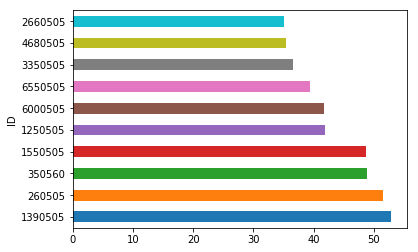

In [23]:
sorted_by_APIndex['APIndex'].head(10).plot(kind="barh")